<p>In this notebook, we're going to explore some data on Hass avocado prices using pandas and seaborn.</p>
<ul>
 <li>   How do avocado prices vary between cities in the US?  </li>
 <li>   How have avocado prices fluctuated in the past few years?</li>
</ul>
<p>First, we'll load the csv file using pandas & take a look at the first few rows.</p>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os,sys
import warnings
warnings.filterwarnings('ignore')

##### 1.load the data 

In [10]:
# load the data from localhost
df = pd.read_csv(r'D:\machine-learning\avocado\avocado.csv',sep=',')

# check the columns in the data set
print('there are %d columns in the data set'%len(df.columns))
for c in df.columns:
    sys.stdout.write(str(c)+', ')

there are 14 columns in the data set
Unnamed: 0, Date, AveragePrice, Total Volume, 4046, 4225, 4770, Total Bags, Small Bags, Large Bags, XLarge Bags, type, year, region, 

<p>There are a few columns we'll be focusing on for this analysis:</p>
<ul>
    <li>Date - The date of the observation</li>
    <li>AveragePrice - the average price of a single avocado</li>
    <li>type - conventional or organic</li>
    <li>year - the year</li>
    <li>Region - the city or region of the observation</li>
    <li>Total Volume - Total number of avocados sold</li>
    <li>4046 - Total number of avocados with PLU 4046 sold</li>
    <li>4225 - Total number of avocados with PLU 4225 sold</li>
    <li>4770 - Total number of avocados with PLU 4770 sold</li>

</ul>

In [11]:
df['Date'] = pd.to_datetime(df['Date'])
df.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


##### 2.check the data 

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
Unnamed: 0      18249 non-null int64
Date            18249 non-null datetime64[ns]
AveragePrice    18249 non-null float64
Total Volume    18249 non-null float64
4046            18249 non-null float64
4225            18249 non-null float64
4770            18249 non-null float64
Total Bags      18249 non-null float64
Small Bags      18249 non-null float64
Large Bags      18249 non-null float64
XLarge Bags     18249 non-null float64
type            18249 non-null object
year            18249 non-null int64
region          18249 non-null object
dtypes: datetime64[ns](1), float64(9), int64(2), object(2)
memory usage: 1.9+ MB


<p> There is no null value in the dataset </p>

In [13]:
df.describe()

,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,18249.000000,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000
mean,24.232232,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,2016.147899
std,15.481045,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.939938
min,0.000000,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000
25%,10.000000,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,2015.000000
50%,24.000000,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,2016.000000
75%,38.000000,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,2017.000000
max,52.000000,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,2018.000000


<p> Look at the price distribution of avocado! </p>

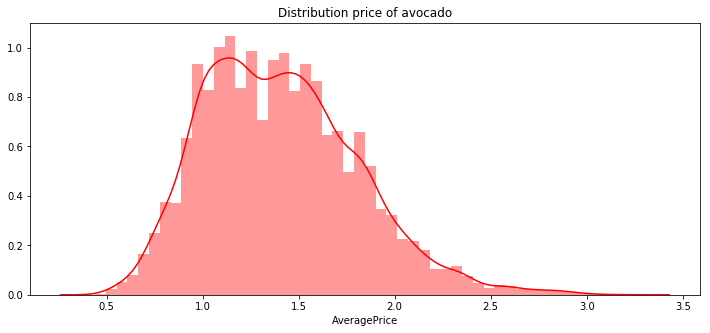

In [14]:
plt.figure(figsize=(12,5))
plt.title('Distribution price of avocado')
sns.distplot(df['AveragePrice'],color='r')
plt.show()

<p> The price of avocados is between 1.0 to 2.0 </p>

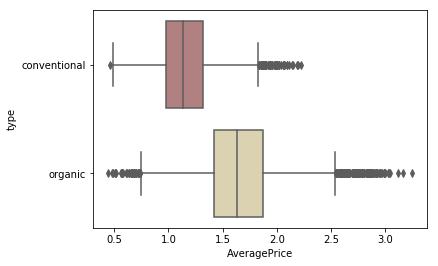

In [15]:
sns.boxplot(y='type',x='AveragePrice',data=df,palette='pink')

<p> The price of Organic avocados are more expensive than conventional avocados  </p>

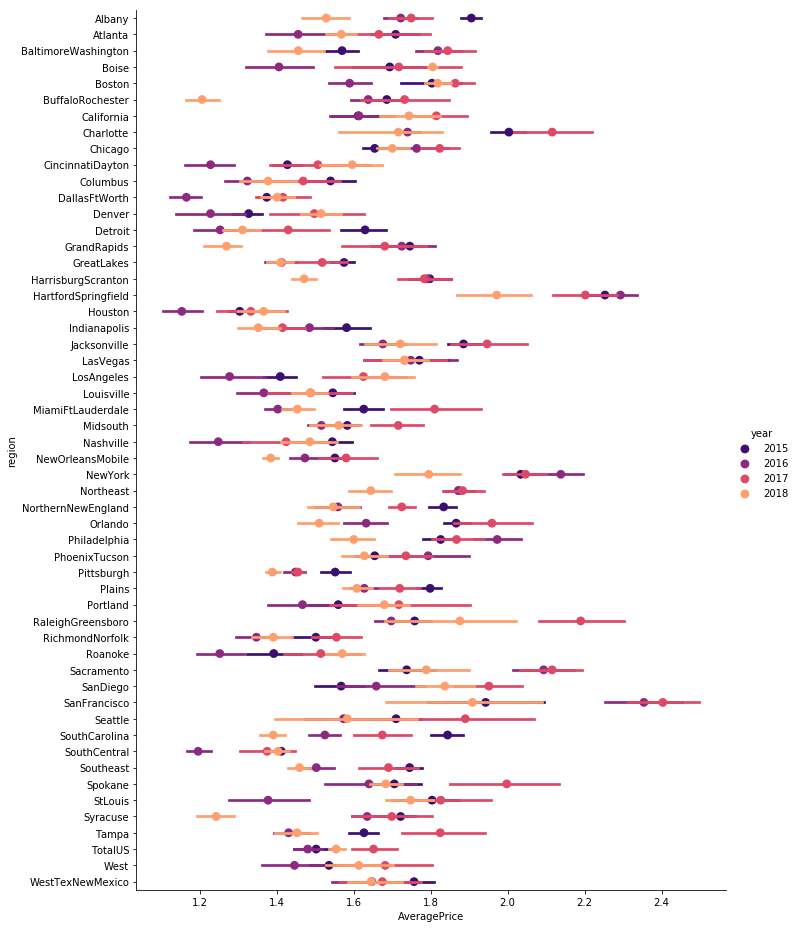

In [16]:
sns.factorplot('AveragePrice','region',
               data=df[df['type'] == 'organic'],
               hue='year',
               size=13,
               aspect=0.8,
               palette='magma',
               join=False)

<p>San Francisco. In 2017, organic avocados were very expensive .Search in Google gave result on this question. In 2017, there was a shortage of avocados. That explains the price increase! </p>

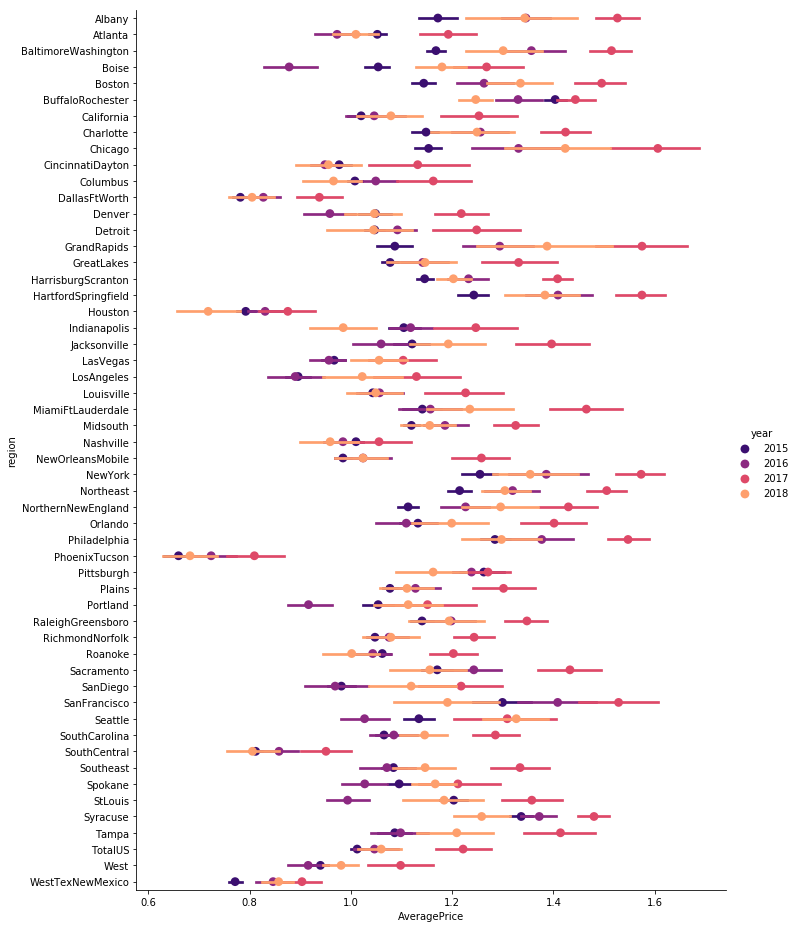

In [9]:
sns.factorplot('AveragePrice','region',
               data=df[df['type'] == 'conventional'],
               hue='year',
               size=13,
               aspect=0.8,
               palette='magma',
               join=False)

<p>For obvious reasons, prices are lower. The situation with the price increase in 2017 also affected this type of avocado.</p>

In [17]:
df['Month'] = df['Date'].dt.month

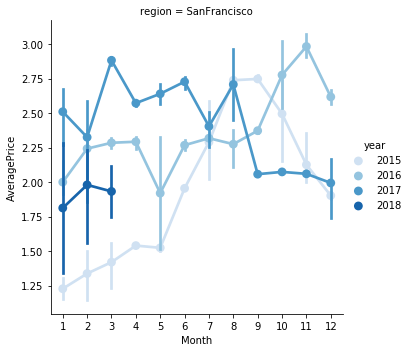

In [18]:
sns.factorplot('Month','AveragePrice',
               data=df[(df['type'] == 'organic') & (df['region'] == 'SanFrancisco') ],
               hue='year',
               row = 'region',
               ascept = 0.8,
               palette='Blues',
               )

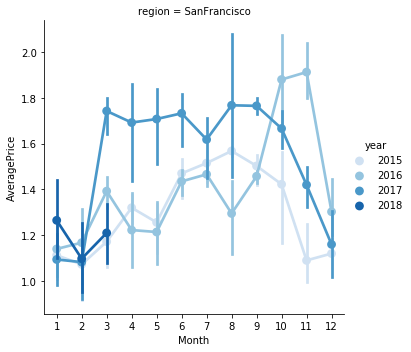

In [12]:
sns.factorplot('Month','AveragePrice',
               data=df[(df['type'] == 'conventional') & (df['region'] == 'SanFrancisco') ],
               hue='year',
               row = 'region',
               ascept = 0.8,
               palette='Blues',
               )

<p>Well, in the 1,2,3 the price of avocado is not so high ,But in the 4,5,6,7,8,9 month the price is high then in the 10,11,12
    the price is going down.Maybe the Spring and Winter are the better season to buy avocado.
</p>

In [51]:
# regions = df.groupby(['region'])
# print('Total regions: %d'%len(regions))
# for name,group in regions:
#     print(name, ' : ' , len(group))

In [19]:
from sklearn.preprocessing import LabelEncoder

label = LabelEncoder()
dicts = {}

label.fit(df['type'].drop_duplicates())
dicts['type'] = list(label.classes_)
df['type'] = label.transform(df['type'])

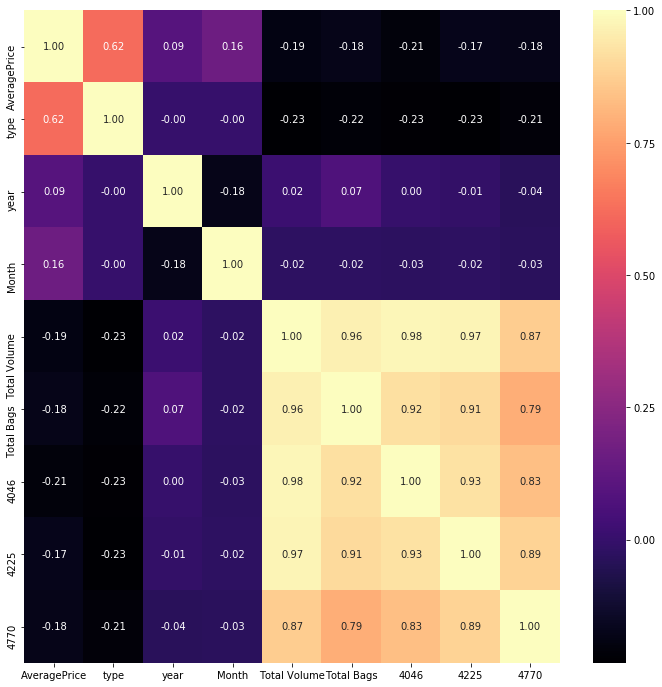

In [20]:
fig,ax = plt.subplots(figsize=(12,12))
cols = ['AveragePrice','type','year','Month','Total Volume','Total Bags','4046','4225','4770']
cm = np.corrcoef(df[cols].values.T)

sns.heatmap(cm,annot=True,fmt='.2f',ax=ax,yticklabels=cols,xticklabels=cols,cmap='magma')

<p>The price of avocado is influenced by the type. Logically. We also see a strong correlation between the features: "Total Bags" and "Total Volume". Also, if you look at the correlation of all the features, you will notice that strongly correlated Small Bags,Large Bag. It is logical but can create problems if we go to predict the price of avocado. I could be wrong, though. I would be grateful to hear the opinion of more experienced people on this issue, thank you!</p>

<p>Until I decided that can be try classified avocado on type. Organic or not? Experiment so experiment!</p>


In [36]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

x = df.drop(['type','region','Date'],axis=1)
y = df['type'].values

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=1)

scaleX = MinMaxScaler(feature_range=[0,1])
x_train[x_train.columns] = scaleX.fit_transform(x_train[x_train.columns])
x_test[x_test.columns] = scaleX.fit_transform(x_test[x_test.columns])


In [22]:
# Logistic

logreg = LogisticRegression(penalty='l1',tol=0.0001).fit(x_train,y_train)

print('LogisticRegression train data score:{:.3f}'.format(logreg.score(x_train,y_train)))
print('LogisticRegression test data score:{:.3f}'.format(logreg.score(x_test,y_test)))


LogisticRegression train data score:0.912
LogisticRegression test data score:0.914


In [37]:
# Random Forest

rfc = RandomForestClassifier(n_estimators=100,random_state=0,max_features=2)
rfc.fit(x_train,y_train)

print('RandomForest Regression train data score:{:.3f}'.format(rfc.score(x_train,y_train)))
print('RandomForest Regression test data score:{:.3f}'.format(rfc.score(x_test,y_test)))

RandomForest Regression train data score:1.000
RandomForest Regression test data score:0.996


In [40]:
# SVM
svm = SVC(kernel='rbf',gamma=0.1,C=200)
svm.fit(x_train,y_train)

print('SVM Regression train data score:{:.3f}'.format(svm.score(x_train,y_train)))
print('SVM Regression test data score:{:.3f}'.format(svm.score(x_test,y_test)))

SVM Regression train data score:0.925
SVM Regression test data score:0.921


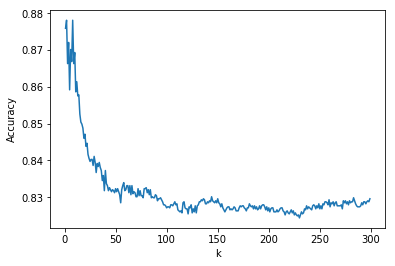

In [24]:
# KNN

scores = []
for each in range(1,300):
    knn_n = KNeighborsClassifier(n_neighbors = each)
    knn_n.fit(x_train,y_train)
    scores.append(knn_n.score(x_test,y_test))
plt.plot(range(1,300),scores)
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.show()




In [41]:
knn = KNeighborsClassifier(n_neighbors=100)
knn.fit(x_train,y_train)
print('KNN Regression train data score:{:.3f}'.format(knn.score(x_train,y_train)))
print('KNN Regression test data score:{:.3f}'.format(knn.score(x_test,y_test)))

KNN Regression train data score:0.844
KNN Regression test data score:0.827


##### confusion matrix

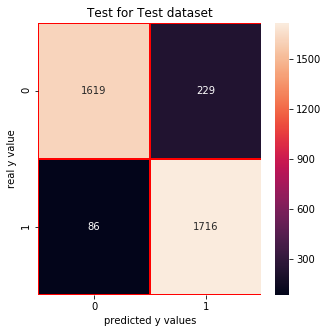

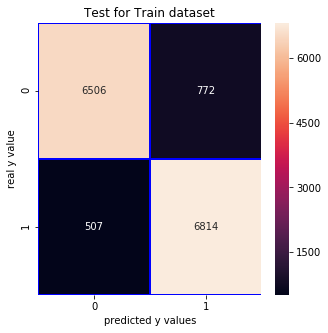

precision_score is :  0.8822622107969151
recall_score is :  0.9522752497225305
f1_score is :  0.9159327461969575


In [42]:
# Logistic 
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score,precision_score,f1_score

cm_log = confusion_matrix(y_test,logreg.predict(x_test))

f,ax = plt.subplots(figsize=(5,5))
sns.heatmap(cm_log,annot=True,linewidths=0.5,linecolor='red',fmt='.0f',ax=ax)
plt.title('Test for Test dataset')
plt.xlabel('predicted y values')
plt.ylabel('real y value')
plt.show()


cm_log_train = confusion_matrix(y_train,logreg.predict(x_train))
f,ax = plt.subplots(figsize=(5,5))
sns.heatmap(cm_log_train,annot=True,linewidths=0.5,linecolor='blue',fmt='.0f',ax=ax)
plt.title('Test for Train dataset')
plt.xlabel('predicted y values')
plt.ylabel('real y value')
plt.show()

print('precision_score is : ',precision_score(y_test,logreg.predict(x_test)))
print('recall_score is : ',recall_score(y_test,logreg.predict(x_test)))
print('f1_score is : ',f1_score(y_test,logreg.predict(x_test)))

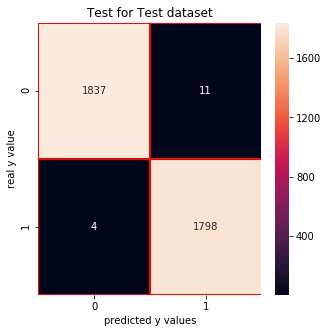

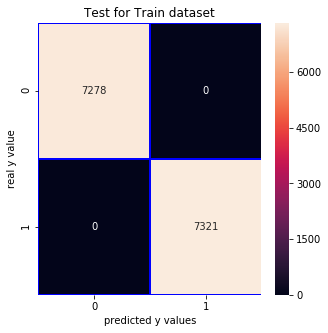

precision_score is :  0.9939192924267551
recall_score is :  0.9977802441731409
f1_score is :  0.9958460260315702


In [44]:
# Random Forest 

cm_rfc = confusion_matrix(y_test,rfc.predict(x_test))

f,ax = plt.subplots(figsize=(5,5))
sns.heatmap(cm_rfc,annot=True,linewidths=0.5,linecolor='red',fmt='.0f',ax=ax)
plt.title('Test for Test dataset')
plt.xlabel('predicted y values')
plt.ylabel('real y value')
plt.show()


cm_rfc_train = confusion_matrix(y_train,rfc.predict(x_train))
f,ax = plt.subplots(figsize=(5,5))
sns.heatmap(cm_rfc_train,annot=True,linewidths=0.5,linecolor='blue',fmt='.0f',ax=ax)
plt.title('Test for Train dataset')
plt.xlabel('predicted y values')
plt.ylabel('real y value')
plt.show()

print('precision_score is : ',precision_score(y_test,rfc.predict(x_test)))
print('recall_score is : ',recall_score(y_test,rfc.predict(x_test)))
print('f1_score is : ',f1_score(y_test,rfc.predict(x_test)))

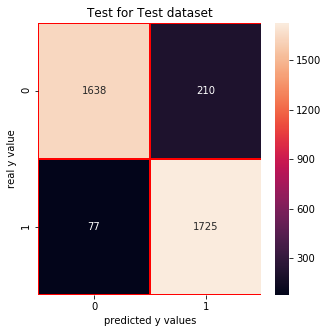

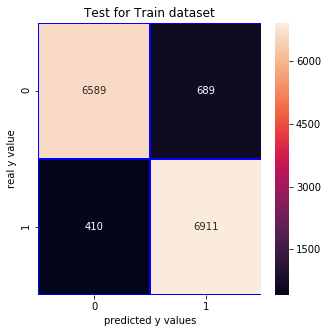

precision_score is :  0.8914728682170543
recall_score is :  0.9572697003329633
f1_score is :  0.9232004281509232


In [45]:
# SVM

cm_svm = confusion_matrix(y_test,svm.predict(x_test))

f,ax = plt.subplots(figsize=(5,5))
sns.heatmap(cm_svm,annot=True,linewidths=0.5,linecolor='red',fmt='.0f',ax=ax)
plt.title('Test for Test dataset')
plt.xlabel('predicted y values')
plt.ylabel('real y value')
plt.show()


cm_svm_train = confusion_matrix(y_train,svm.predict(x_train))
f,ax = plt.subplots(figsize=(5,5))
sns.heatmap(cm_svm_train,annot=True,linewidths=0.5,linecolor='blue',fmt='.0f',ax=ax)
plt.title('Test for Train dataset')
plt.xlabel('predicted y values')
plt.ylabel('real y value')
plt.show()

print('precision_score is : ',precision_score(y_test,svm.predict(x_test)))
print('recall_score is : ',recall_score(y_test,svm.predict(x_test)))
print('f1_score is : ',f1_score(y_test,svm.predict(x_test)))


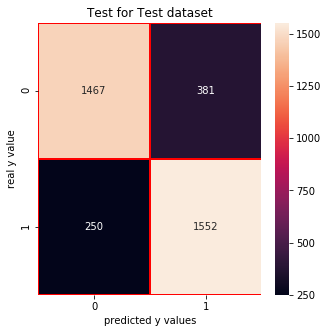

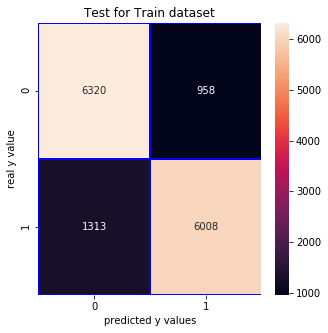

precision_score is :  0.8028970512157269
recall_score is :  0.8612652608213096
f1_score is :  0.8310575635876841


In [46]:
# KNN

cm_knn = confusion_matrix(y_test,knn.predict(x_test))

f,ax = plt.subplots(figsize=(5,5))
sns.heatmap(cm_knn,annot=True,linewidths=0.5,linecolor='red',fmt='.0f',ax=ax)
plt.title('Test for Test dataset')
plt.xlabel('predicted y values')
plt.ylabel('real y value')
plt.show()


cm_knn_train = confusion_matrix(y_train,knn.predict(x_train))
f,ax = plt.subplots(figsize=(5,5))
sns.heatmap(cm_knn_train,annot=True,linewidths=0.5,linecolor='blue',fmt='.0f',ax=ax)
plt.title('Test for Train dataset')
plt.xlabel('predicted y values')
plt.ylabel('real y value')
plt.show()

print('precision_score is : ',precision_score(y_test,knn.predict(x_test)))
print('recall_score is : ',recall_score(y_test,knn.predict(x_test)))
print('f1_score is : ',f1_score(y_test,knn.predict(x_test)))


<p>I believed in you, random forest regression! The RandomForestClassifier has the highest accuracy and f1 score .It's the best model
for the avocados data set</p>